In [1]:
import pandas as pd
import numpy as np
import cv2

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report

from sklearn import svm

import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from subprocess import check_call
from google.colab.patches import cv2_imshow

In [2]:
df = pd.read_excel('datasetbantuan.xlsx')
df = df.loc[1:,:]
df.head(1)

,NO,NAMA,Luas lantai,Lantai,Dinding,Tdk mem.,Tdk ada,Air Minum,Kayu bakar/,daging 1x,...,Tdk mem..1,Lansia,Disabilitas,Usia Dini,Ibu Hamil,Anak SD,Anak SMP,Anak SMA,Total,Kategori
1,1.0,MARYANTO,1,1,0,1,0,1,0,1,...,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,12.0,BLT


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# New section

In [4]:
col = ['no','nama','luas_lantai','lantai_tanah',
       'dinding_bambu','tidak_punya_mck','tidak_punya_listrik',
       'air_minum_sumur','kayu_bakar','daging_satu_seminggu',
       'satu_baju_setahun','makan_satu_dua_sehari','tidak_sanggup_berobat',
       'penghasilan_dibawah_600','kk_tidak_sekolah','tidak_punya_tabungan',
       'lansia','disabilitas','usia_dini','ibu_hamil','anak_sd',
       'anak_smp','anak_sma','not_set','label']

In [5]:
arr = df.to_numpy()
df = pd.DataFrame(arr, columns=col)
df.head(1)

,no,nama,luas_lantai,lantai_tanah,dinding_bambu,tidak_punya_mck,tidak_punya_listrik,air_minum_sumur,kayu_bakar,daging_satu_seminggu,...,tidak_punya_tabungan,lansia,disabilitas,usia_dini,ibu_hamil,anak_sd,anak_smp,anak_sma,not_set,label
0,1.0,MARYANTO,1,1,0,1,0,1,0,1,...,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,12.0,BLT


In [6]:
df.to_excel('dataready.xlsx')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   no                       375 non-null    object
 1   nama                     375 non-null    object
 2   luas_lantai              375 non-null    object
 3   lantai_tanah             375 non-null    object
 4   dinding_bambu            375 non-null    object
 5   tidak_punya_mck          375 non-null    object
 6   tidak_punya_listrik      375 non-null    object
 7   air_minum_sumur          375 non-null    object
 8   kayu_bakar               375 non-null    object
 9   daging_satu_seminggu     375 non-null    object
 10  satu_baju_setahun        375 non-null    object
 11  makan_satu_dua_sehari    375 non-null    object
 12  tidak_sanggup_berobat    375 non-null    object
 13  penghasilan_dibawah_600  375 non-null    object
 14  kk_tidak_sekolah         375 non-null    o

In [8]:
df.isnull().sum()

no                         0
nama                       0
luas_lantai                0
lantai_tanah               0
dinding_bambu              0
tidak_punya_mck            0
tidak_punya_listrik        0
air_minum_sumur            0
kayu_bakar                 0
daging_satu_seminggu       0
satu_baju_setahun          0
makan_satu_dua_sehari      0
tidak_sanggup_berobat      0
penghasilan_dibawah_600    0
kk_tidak_sekolah           0
tidak_punya_tabungan       0
lansia                     0
disabilitas                0
usia_dini                  0
ibu_hamil                  0
anak_sd                    0
anak_smp                   0
anak_sma                   0
not_set                    0
label                      0
dtype: int64

In [9]:
df['anak_sma'].replace('', np.nan, inplace=True)
df.dropna(subset=['anak_sma'], inplace=True)

In [10]:
cek = df["label"].value_counts()
cek

BLT      135
TIDAK    134
PKH      106
Name: label, dtype: int64

In [11]:
label_encoder = preprocessing.LabelEncoder()
df['label_enc']= label_encoder.fit_transform(df['label'])
df.head(1)

,no,nama,luas_lantai,lantai_tanah,dinding_bambu,tidak_punya_mck,tidak_punya_listrik,air_minum_sumur,kayu_bakar,daging_satu_seminggu,...,lansia,disabilitas,usia_dini,ibu_hamil,anak_sd,anak_smp,anak_sma,not_set,label,label_enc
0,1.0,MARYANTO,1,1,0,1,0,1,0,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,12.0,BLT,0


In [12]:
print(df['label'].unique())
print(df['label_enc'].unique())

['BLT' 'PKH' 'TIDAK']
[0 1 2]


In [13]:
X = df.loc[:,'luas_lantai':'anak_sma']
y = df['label']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)

In [15]:
len(y_test)

75

In [16]:
model = DecisionTreeClassifier()
model = model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9466666666666667


In [17]:
#Confusion Matrix
def print_conf(y_test, result, classes, title='Confusion matrix'):
  conf_matrix = metrics.confusion_matrix(y_test, result)
  plt.figure(figsize=(6,6))
  sns.heatmap(conf_matrix, 
              annot=True,
              xticklabels=classes, 
              yticklabels=classes,
              cmap="Pastel1",
              fmt='d')
  plt.ylabel('Actual')
  plt.xlabel('Predicted')
  plt.title(title)
  plt.show()

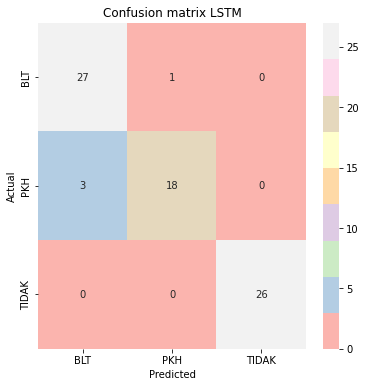

In [18]:
print_conf(y_test, y_pred, ['BLT', 'PKH', 'TIDAK'], title="Confusion matrix LSTM")

In [19]:
cross_val_score(model, X, y, cv=10)

array([0.86842105, 0.89473684, 0.92105263, 1.        , 1.        ,
       1.        , 1.        , 0.97297297, 0.97297297, 1.        ])

In [20]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         BLT       0.90      0.96      0.93        28
         PKH       0.95      0.86      0.90        21
       TIDAK       1.00      1.00      1.00        26

    accuracy                           0.95        75
   macro avg       0.95      0.94      0.94        75
weighted avg       0.95      0.95      0.95        75



In [21]:
from sklearn.tree import export_graphviz
export_graphviz(
    model,
    out_file = "tree.dot",
    feature_names = col[2:23],
    class_names = ['BLT', 'TIDAK', 'PKH' ],
    rounded= True,
    filled =True,
    special_characters=True
)

In [ ]:
check_call(['dot','-Tpng','tree.dot','-o','tree.png'])
tree_image = cv2.imread('tree.png')
cv2_imshow(tree_image)

In [ ]:
from sklearn.tree import export_text
print(export_text(model, feature_names=col[2:23]))

In [ ]:
ccp_alphas, impurities = model.cost_complexity_pruning_path(X,y)

In [ ]:
col

In [ ]:
luas_lantai = 1
lantai_tanah = 1
dinding_bambu = 1
tidak_punya_mck = 1
tidak_punya_listrik = 1
air_minum_sumur = 1
kayu_bakar = 1
daging_satu_seminggu = 1
satu_baju_setahun = 1
makan_satu_dua_sehari = 0
tidak_sanggup_berobat = 0
penghasilan_dibawah_600 = 0
kk_tidak_sekolah = 0
tidak_punya_tabungan = 0
lansia = 0
disabilitas = 0
usia_dini = 0
ibu_hamil = 0 
anak_sd = 0
anak_smp = 0
anak_sma = 0

In [ ]:
data = [
        luas_lantai,
        lantai_tanah,
        dinding_bambu,
        tidak_punya_mck,
        tidak_punya_listrik,
        air_minum_sumur,
        kayu_bakar,
        daging_satu_seminggu,
        satu_baju_setahun,
        makan_satu_dua_sehari,
        tidak_sanggup_berobat,
        penghasilan_dibawah_600,
        kk_tidak_sekolah,
        tidak_punya_tabungan,
        lansia,
        disabilitas,
        usia_dini,
        ibu_hamil,
        anak_sd,
        anak_smp,
        anak_sma,
        ]

In [ ]:
model.predict([data])